In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from pylab import rcParams

rcParams['figure.figsize'] = 10, 10


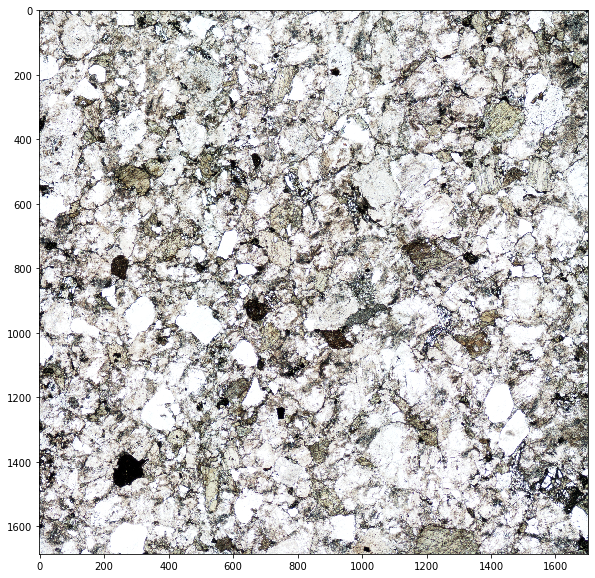

In [2]:
img = plt.imread("PPL001.jpg")
rcParams["figure.figsize"] = 10,10
plt.imshow(img)

In [37]:
def quantize_image(img, n_clusters):
    """
    Agrupa los pixeles en una imagen y regresa la imagen cuantizada
    
    img - 3D numpy array
    n_clusters - numero de clusters o colores en la imagen final 
    
    """
    
    img = np.array(img, dtype=np.float64)/255 # se normaliza
    
    m,l,k = img.shape[0],img.shape[1], img.shape[2] # redimesionando los datos
    df = pd.DataFrame(img.reshape(m*l, k))
    df.columns = ["R", "G", "B"]
    
    
    kmeans = KMeans(n_clusters= n_clusters)
    
    kmeans.fit(df.sample(5000))
    
    df["clusters"]= kmeans.predict(df)
    
    centers = pd.DataFrame(kmeans.cluster_centers_)
    
    centers["clusters"] = range(n_clusters)
    
    
    df["ind"] = df.index
    df = df.merge(centers)
    df = df.sort_values("ind")
    df = df.drop("ind", 1)
    
    quant_img = df.iloc[:,4:7].values

    quant_img = quant_img.reshape(img.shape[0], img.shape[1], img.shape[2])
    
    #quant_img = quant_img*255
    
    quant_img = np.array(quant_img, dtype=np.float64)
    

    return quant_img



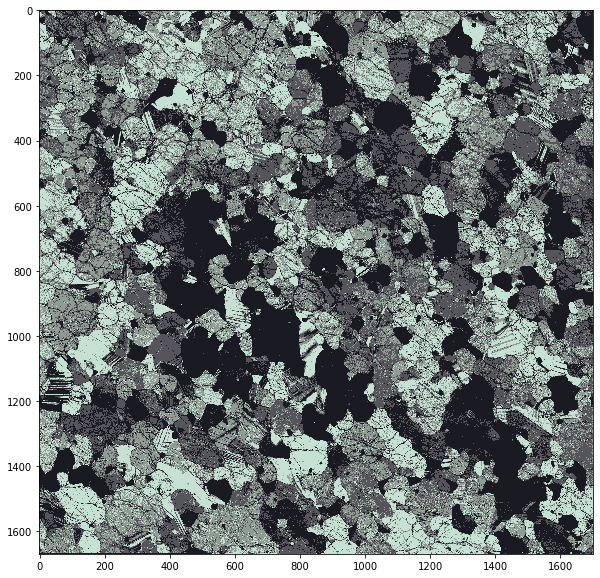

In [38]:
img = plt.imread("troct.jpg")

img = img[:,:,:3]

plt.imshow(quantize_image(img, n_clusters=4))
